In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from google.colab import drive 
drive.mount('/content/gdrive' , force_remount=True)


Mounted at /content/gdrive


In [5]:
#/content/gdrive/MyDrive/MainData.csv

In [6]:
path_to_csv = '/content/gdrive/MyDrive/MainData.csv'

df = pd.read_csv(path_to_csv)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (24,27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
def regex_search(reg, input_list):
  output_list = []
  for c in input_list:
      c_search = re.search(reg , c)
      if c_search:
        output_list.append(c_search.group(0))
  return output_list

In [8]:
grouped_columns = list()
list_columns = df.columns

list_codes = regex_search("code_(.\d\d)", list_columns) 

list_codes = sorted(set(list_codes))

# grouped_columns = [regex_search( '^((?!frequency).)*$', list(df.filter(like=c)))  for c in list_codes]
# grouped_columns = [[regex_search( '^((?!frequency).)*$', list(df.filter(like=c))), sorted(regex_search('^((?!\d\dX).)*$', list(df.filter(like=c)))), sorted(regex_search('code_.\d\dX.*', list(df.filter(like=c))))]  for c in list_codes]

for c in list_codes:
  r_list = sorted(regex_search( '^((?!frequency).)*$', list(df.filter(like=c))))
  grouped_columns.append([r_list, sorted(regex_search('^((?!\d\dX).)*$', r_list)), sorted(regex_search('code_.\d\dX.*', r_list))])


group_code = dict(zip(list_codes, grouped_columns))

print(group_code)

{'code_A01': [['code_A01_1st'], ['code_A01_1st'], []], 'code_A02': [['code_A02_1st'], ['code_A02_1st'], []], 'code_A03': [['code_A03X_1st', 'code_A03_1st'], ['code_A03_1st'], ['code_A03X_1st']], 'code_A04': [['code_A04_1st', 'code_A04_2nd'], ['code_A04_1st', 'code_A04_2nd'], []], 'code_A05': [['code_A05X_1st', 'code_A05X_2nd', 'code_A05_1st', 'code_A05_2nd'], ['code_A05_1st', 'code_A05_2nd'], ['code_A05X_1st', 'code_A05X_2nd']], 'code_A06': [['code_A06_1st'], ['code_A06_1st'], []], 'code_A08': [['code_A08_1st'], ['code_A08_1st'], []], 'code_A09': [['code_A09_1st'], ['code_A09_1st'], []], 'code_A11': [['code_A11X_1st', 'code_A11_1st'], ['code_A11_1st'], ['code_A11X_1st']], 'code_A29': [['code_A29_1st'], ['code_A29_1st'], []], 'code_A30': [['code_A30_1st', 'code_A30_2nd', 'code_A30_3rd'], ['code_A30_1st', 'code_A30_2nd', 'code_A30_3rd'], []], 'code_A32': [['code_A32_1st', 'code_A32_2nd', 'code_A32_3rd', 'code_A32_4th', 'code_A32_5th'], ['code_A32_1st', 'code_A32_2nd', 'code_A32_3rd', 'co

In [9]:
group_code['code_D16']

[['code_D16X_1st',
  'code_D16X_2nd',
  'code_D16_1st',
  'code_D16_2nd',
  'code_D16_3rd'],
 ['code_D16_1st', 'code_D16_2nd', 'code_D16_3rd'],
 ['code_D16X_1st', 'code_D16X_2nd']]

In [10]:
def adjust_lists(sum_code_nx, sum_code_x, max_l):
  sum_code_nx = [l + ([0] * (max_l-len(l))) for l in sum_code_nx]
  sum_code = [ sum_code_nx[i] + sum_code_x[i] for i in range(len(sum_code_nx))]
  return sum_code

In [11]:

sum_code_nx = [list(df[group_code[k][1]].sum()) for k in list_codes]
sum_code_x = [list(df[group_code[k][2]].sum()) for k in list_codes]

sum_code_crc_nx = [list(df.loc[(df["Case_Control"] == 1)][group_code[k][1]].sum()) for k in list_codes]
sum_code_crc_x = [list(df.loc[(df["Case_Control"] == 1)][group_code[k][2]].sum()) for k in list_codes]

sum_code_noncrc_nx = [list(df.loc[(df["Case_Control"] == 0)][group_code[k][1]].sum()) for k in list_codes]
sum_code_noncrc_x = [list(df.loc[(df["Case_Control"] == 0)][group_code[k][2]].sum()) for k in list_codes]


# sorted(group_code.items(), key=lambda item: item[1][2])

max_l = len(max(sum_code_nx,key=len))

sum_code = adjust_lists(sum_code_nx, sum_code_x, max_l)
sum_code_crc = adjust_lists(sum_code_crc_nx, sum_code_crc_x, max_l)
sum_code_noncrc = adjust_lists(sum_code_noncrc_nx, sum_code_noncrc_x, max_l)

In [12]:
print(sum_code)
print(sum_code_crc)
print(sum_code_noncrc)

[[100.0, 0, 0, 0, 0, 0, 0], [35.0, 0, 0, 0, 0, 0, 0], [132.0, 0, 0, 0, 0, 0, 0, 104.0], [369.0, 117.0, 0, 0, 0, 0, 0], [230.0, 62.0, 0, 0, 0, 0, 0, 138.0, 26.0], [99.0, 0, 0, 0, 0, 0, 0], [67.0, 0, 0, 0, 0, 0, 0], [54.0, 0, 0, 0, 0, 0, 0], [150.0, 0, 0, 0, 0, 0, 0, 61.0], [256.0, 0, 0, 0, 0, 0, 0], [652.0, 224.0, 83.0, 0, 0, 0, 0], [599.0, 296.0, 152.0, 80.0, 48.0, 0, 0], [1321.0, 870.0, 571.0, 397.0, 278.0, 209.0, 150.0], [982.0, 615.0, 169.0, 85.0, 56.0, 0, 0], [58.0, 0, 0, 0, 0, 0, 0], [102.0, 0, 0, 0, 0, 0, 0], [266.0, 153.0, 107.0, 87.0, 69.0, 59.0, 0], [924.0, 527.0, 330.0, 215.0, 135.0, 98.0, 71.0], [226.0, 62.0, 0, 0, 0, 0, 0], [405.0, 131.0, 49.0, 0, 0, 0, 0], [84.0, 0, 0, 0, 0, 0, 0], [74.0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 30.0], [92.0, 45.0, 17.0, 0, 0, 0, 0], [62.0, 14.0, 0, 0, 0, 0, 0], [165.0, 63.0, 23.0, 0, 0, 0, 0, 44.0], [148.0, 51.0, 24.0, 0, 0, 0, 0], [44.0, 0, 0, 0, 0, 0, 0], [44.0, 0, 0, 0, 0, 0, 0], [193.0, 77.0, 39.0, 16.0, 11.0, 0, 0, 14.0], [159.0, 47.

In [13]:
def plot_function(sum_code):
  headers = ['first', 'second', 'third', 'fourth', 'fifth', 'sixth', 'seventh', 'Xfirst', 'Xsecond']
  df2 = pd.DataFrame(sum_code, columns=headers)
  df2['Codes'] = list_codes

  # df2.index.names = ['Frequency']

  plt.rcParams["figure.figsize"] = (80,20)


  plot = df2.plot.bar(x='Codes', stacked=True, title='Frequency of codes')
  plt.ylabel('Frequency')

  params = {'legend.fontsize': 30,
            'figure.figsize': (80,25),
          'axes.labelsize': 30,
          'axes.titlesize':35,
          'xtick.labelsize':'x-large',
          'ytick.labelsize':25}
  plt.rcParams.update(params)
  return df2

In [14]:
def plot_function_2(df2):
  # plt.rcParams.update(plt.rcParamsDefault)
  plt.rcParams["figure.figsize"] = (100,30)


  plot = df2.plot.bar(x='Codes', stacked=True, title='Frequency of codes')
  plt.ylabel('Frequency')
  plt.xticks(verticalalignment="top") 
  params = {'legend.fontsize': 55,
            'figure.figsize': (80,25),
            'axes.labelsize': 30,
            'axes.titlesize':35,
            'xtick.labelsize': 10,
            'ytick.labelsize':25}
  plt.rcParams.update(params)



In [15]:
def sort_df(df):
  # df['sum'] = df. iloc[:, :9].sum(axis=1)
  s = df. iloc[:, :9].sum(axis=1)
  s = s.sort_values(ascending=False).index
  df = df.reindex(s)
  return df

# For all patients, frequency of particular code (with frequency for first, second..)


Maximum frequency of particular code for particular patient goes up to 7, example:

'code_A34_1st',
'code_A34_2nd',
'code_A34_3rd',
'code_A34_4th',
'code_A34_5th',
'code_A34_6th',
'code_A34_7th'

In the legend that correspond to: 'first', 'second', 'third', 'fourth', 'fifth', 'sixth', 'seventh'


Some codes have X inside, example:

 'code_D16X_1st',
 'code_D16X_2nd',

In the legend that correspond to: 'Xfirst', 'Xsecond'

You can click on the image to increase for details.



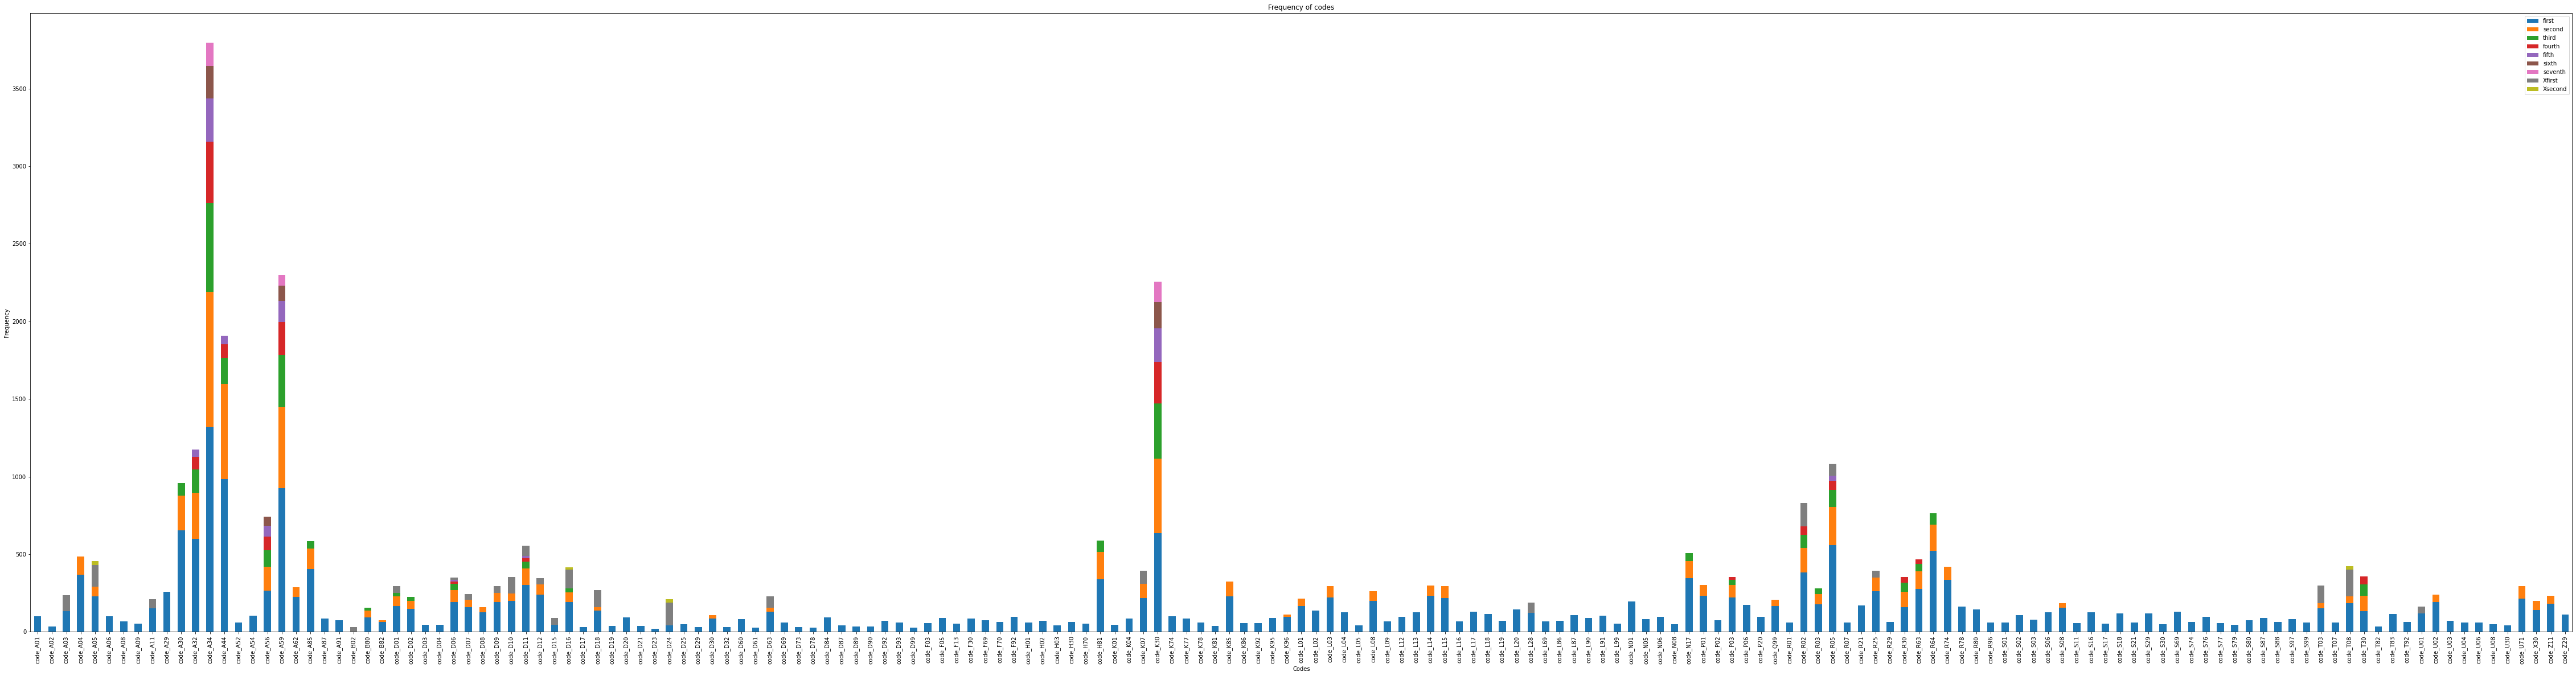

In [16]:
df2 = plot_function(sum_code)

# Sorted
same data as above, visualisation after sorting

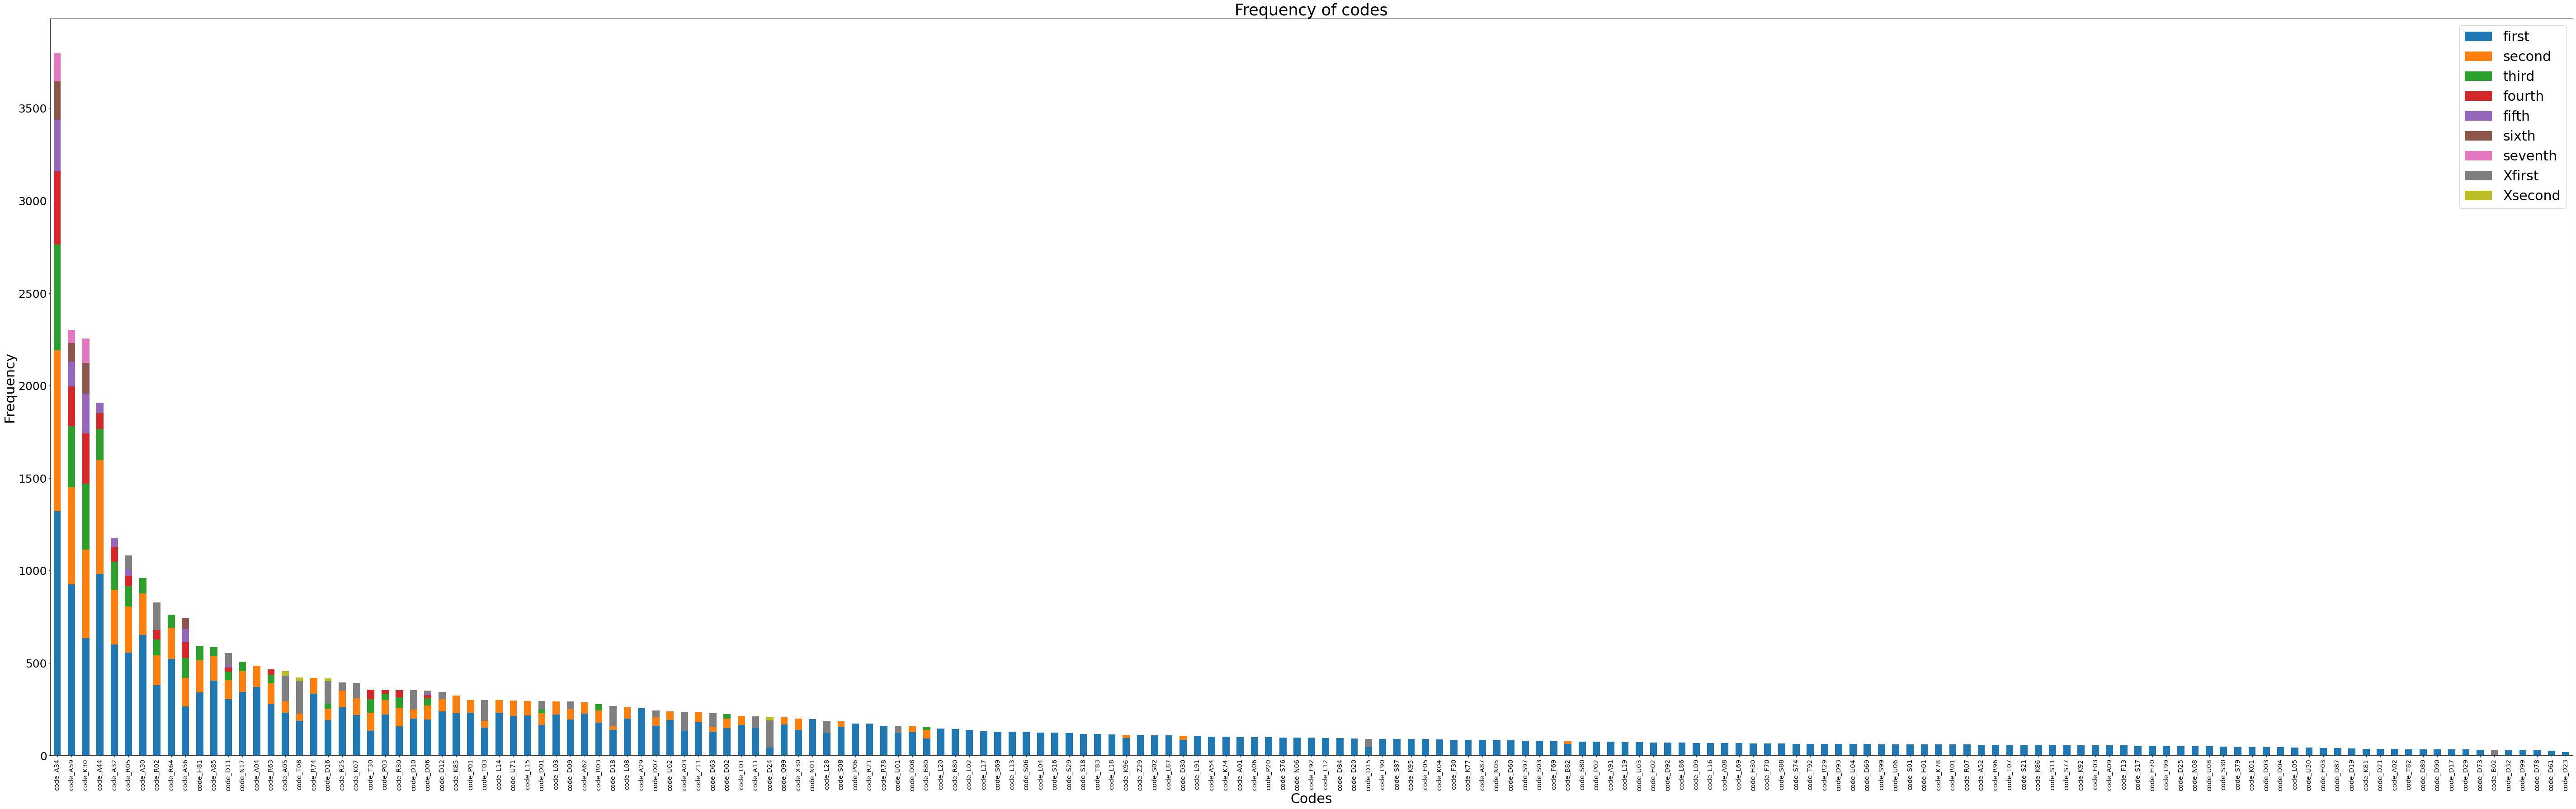

In [17]:
df2 = sort_df(df2)
plot_function_2(df2)

# For colorectal patients, frequency of particular code (with frequency for first, second..) 

You can click on the image to increase for details.



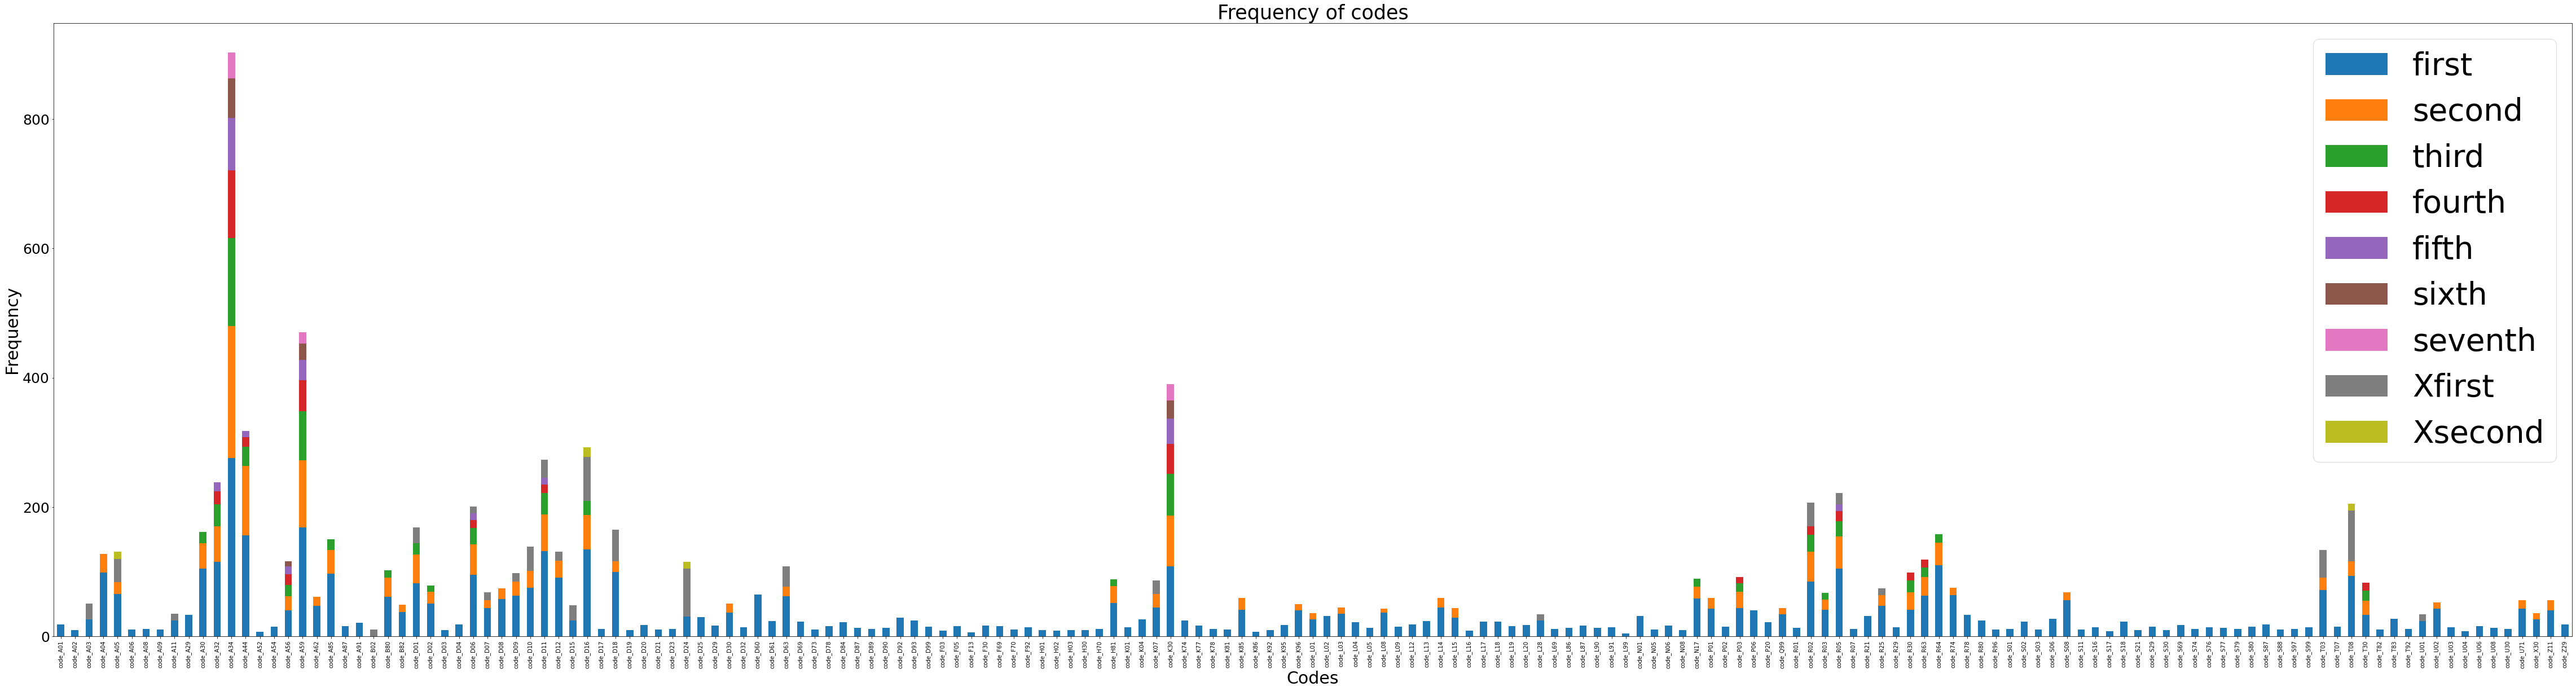

In [18]:
df3 = plot_function(sum_code_crc)


# Sorted


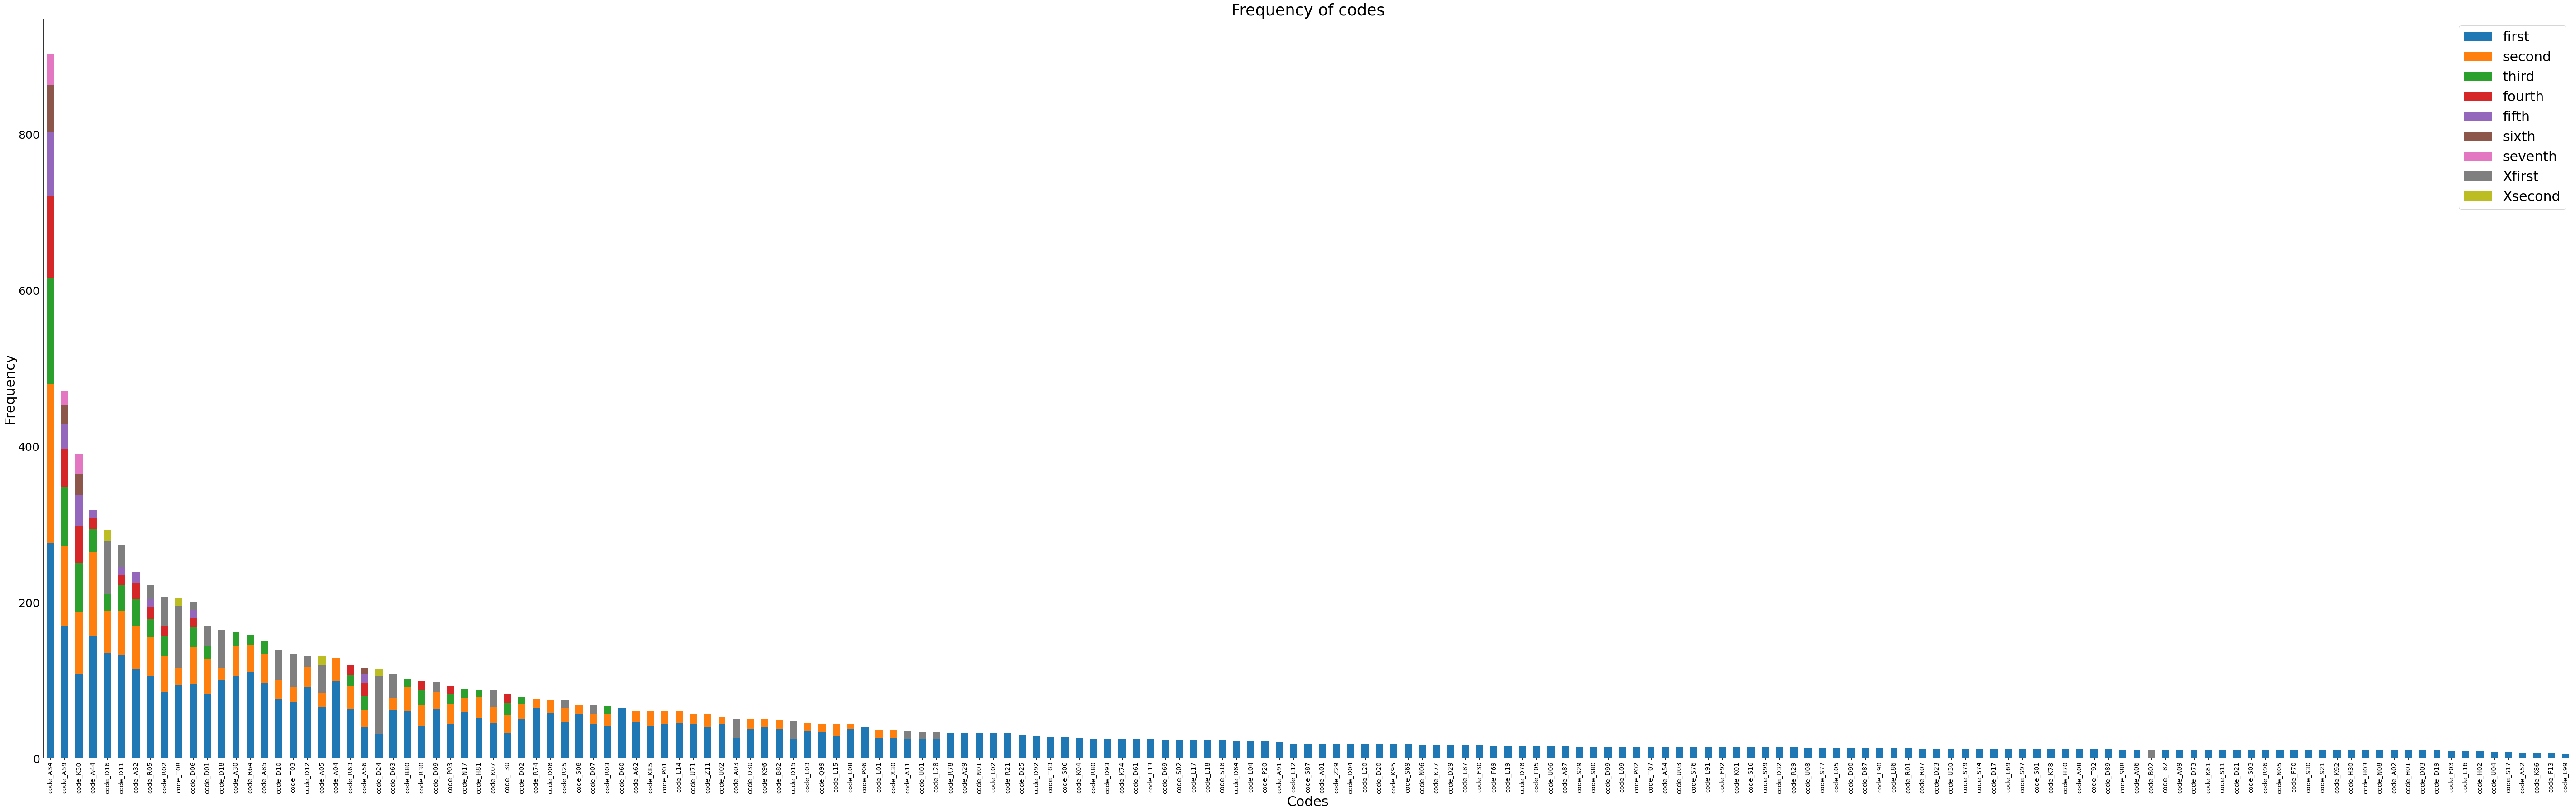

In [19]:
df3 = sort_df(df3)
plot_function_2(df3)

# For patients who do not have colorectal cancer, frequency of particular code (with frequency for first, second..) 

You can click on the image to increase for details.

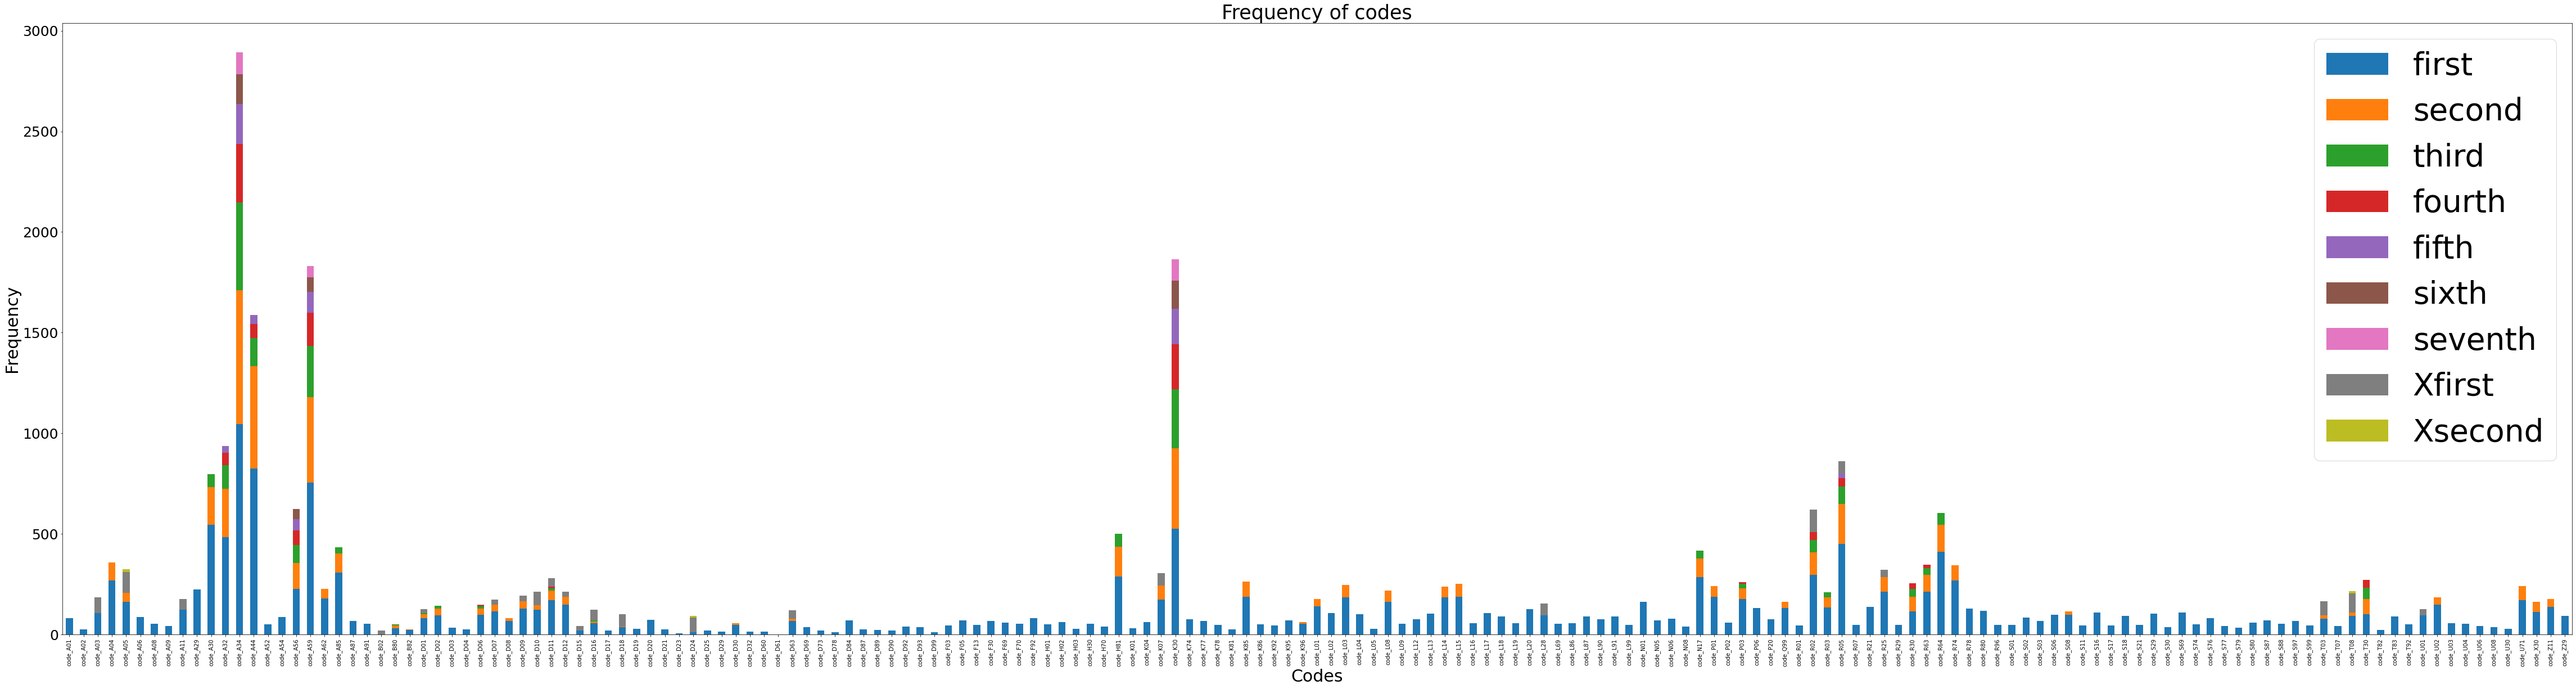

In [20]:
df4 = plot_function(sum_code_noncrc)

# Sorted

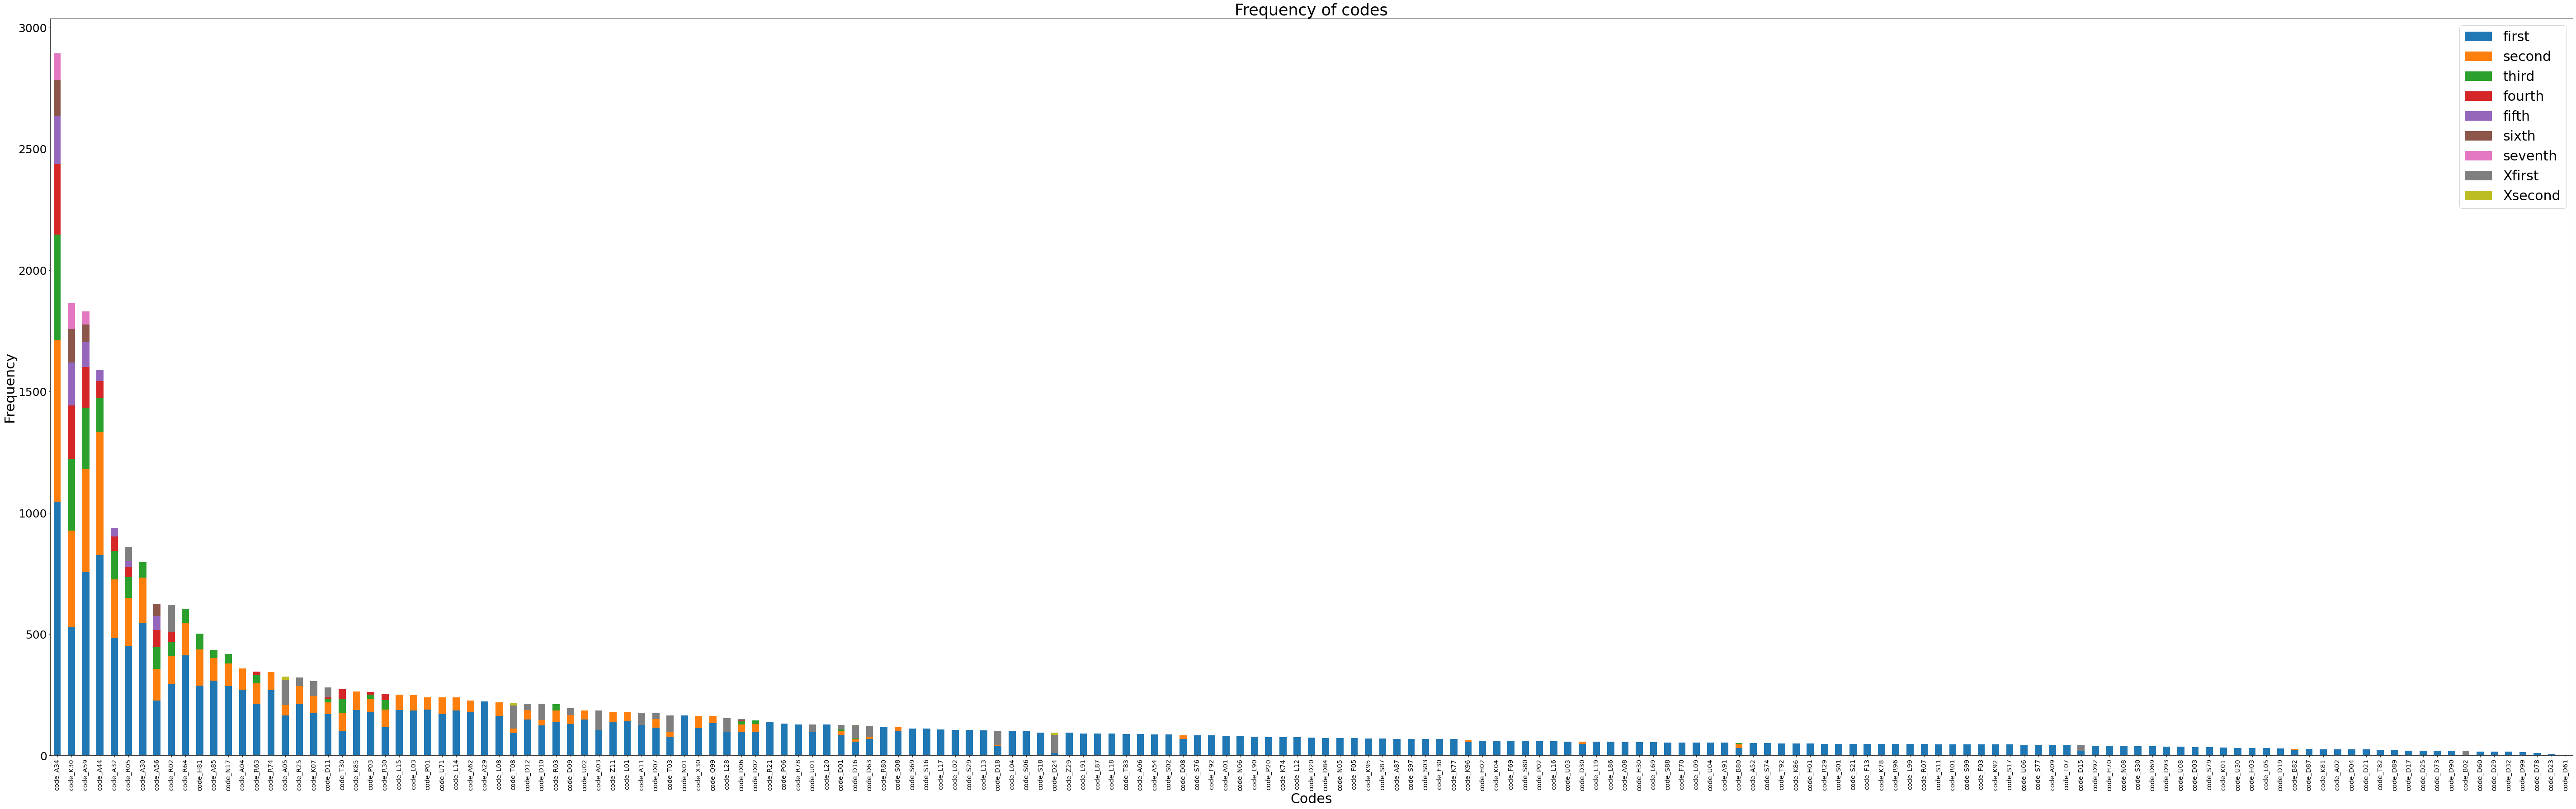

In [21]:
df4 = sort_df(df4)
plot_function_2(df4)

In [22]:
df3['Codes'] = df3['Codes'] + '_CRC'  

In [23]:
df4['Codes'] = df4['Codes'] + '_nonCRC'  

In [24]:
df5 = pd.concat([df3, df4], axis=0)
df5.sort_values(by=['Codes'], inplace=True)

In [25]:
half = int(df5.shape[0]/2) + 1
df5a = df5[:half]
df5b = df5[half:]

# Comparation patients who have (_CRC) and do not have (_nonCRC) colorectal cancer, frequency of particular code (with frequency for first, second..) 

Example: 

code_A01_CRC (code_A01 frequency in patients who have colorectal cancer) and

code_A01_nonCRC (code_A01 frequency in patients who do not have colorectal cancer)

You can click on the image to increase for details.

# First part: code_A01 - code_L01

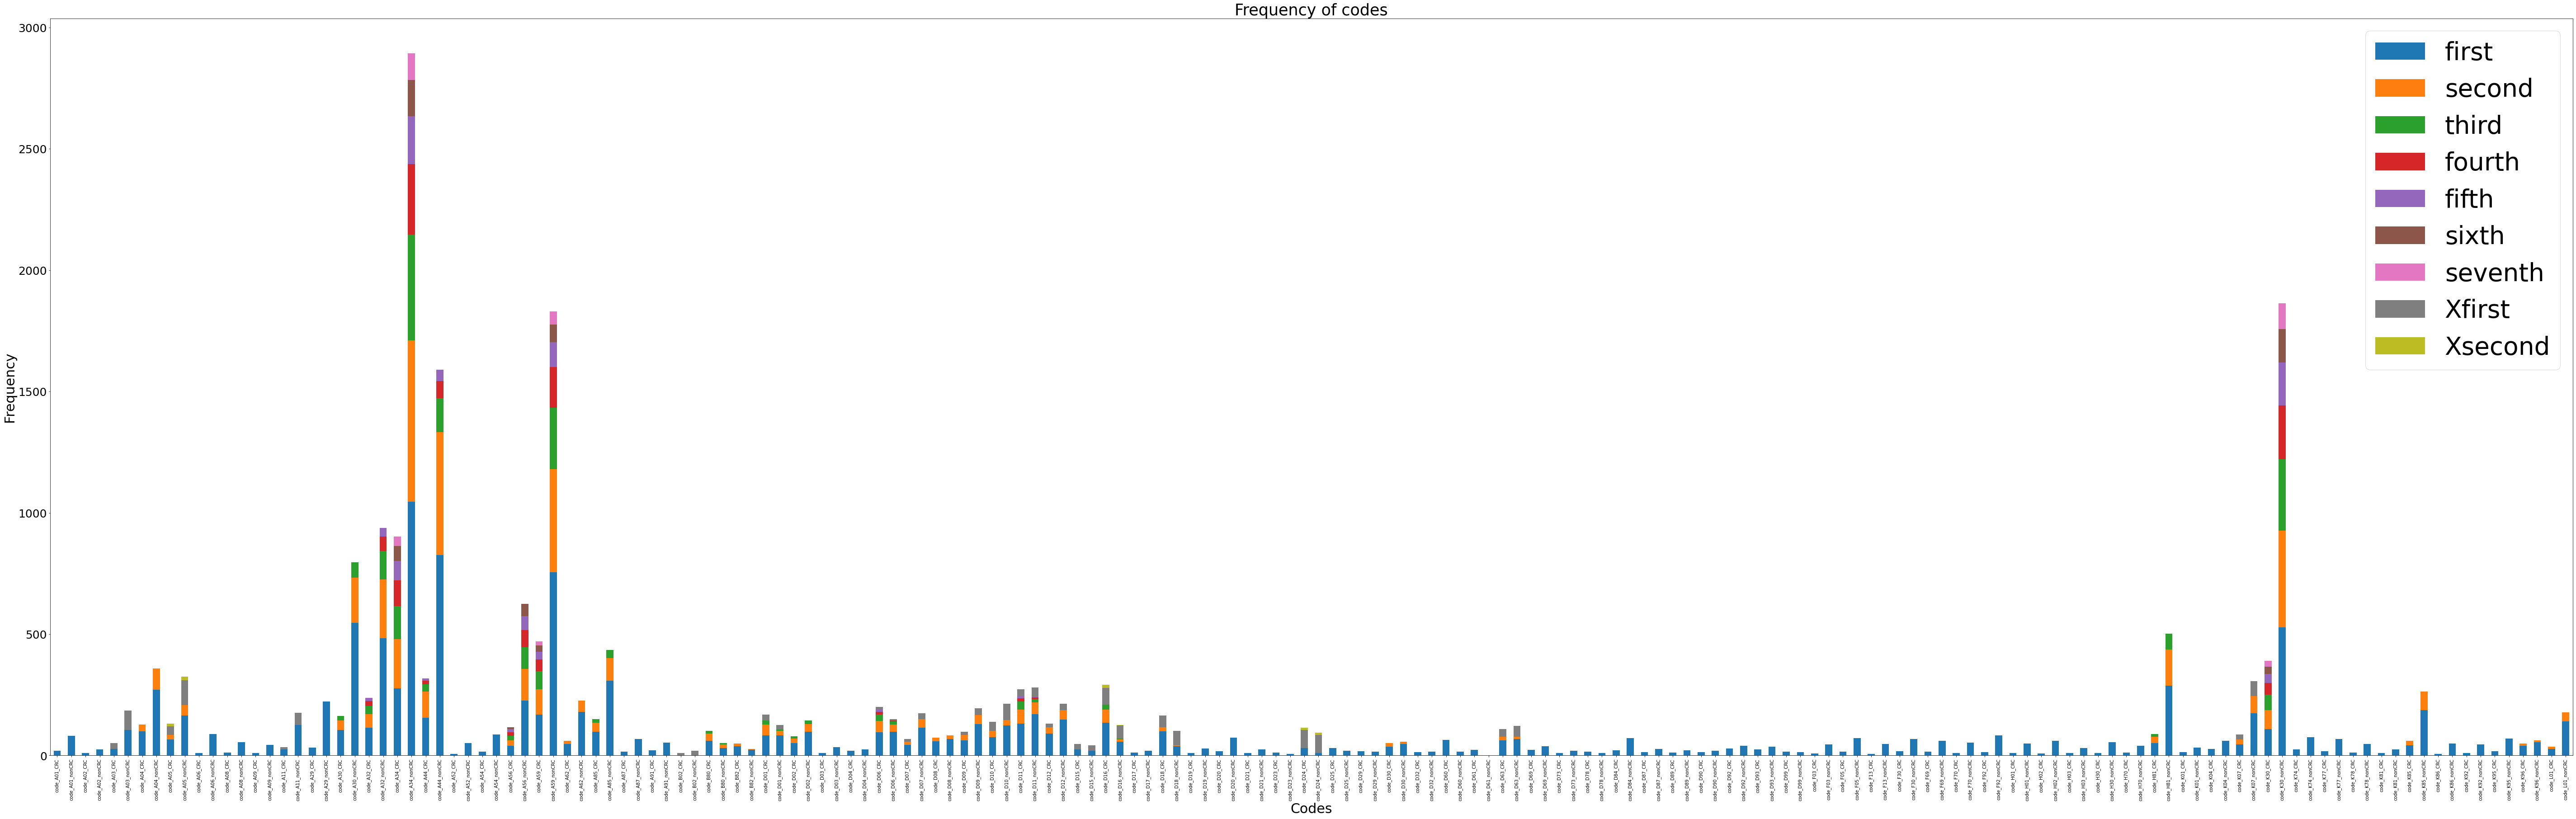

In [26]:
plot_function_2(df5a)

# Second part: code_L02 - code_Z29

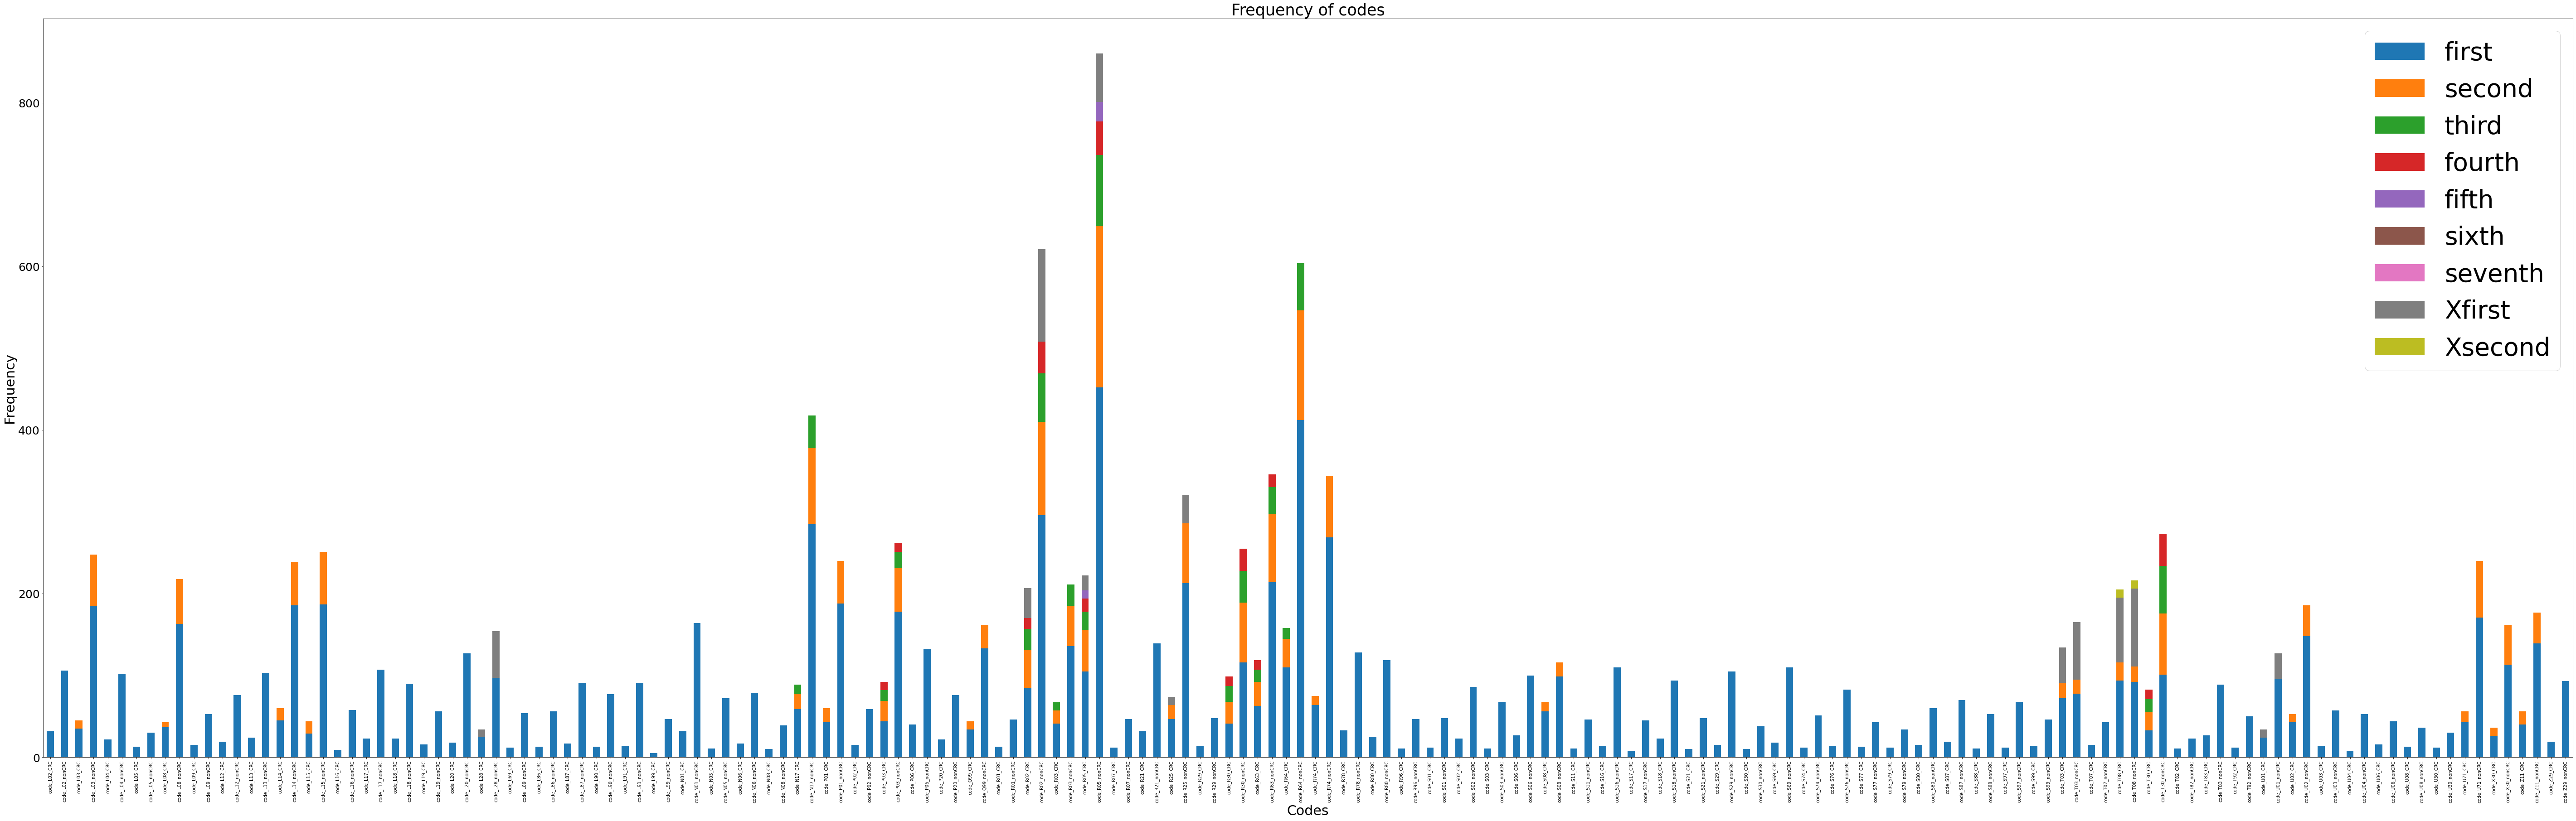

In [27]:
plot_function_2(df5b)

# All codes comparation crc and noncrc

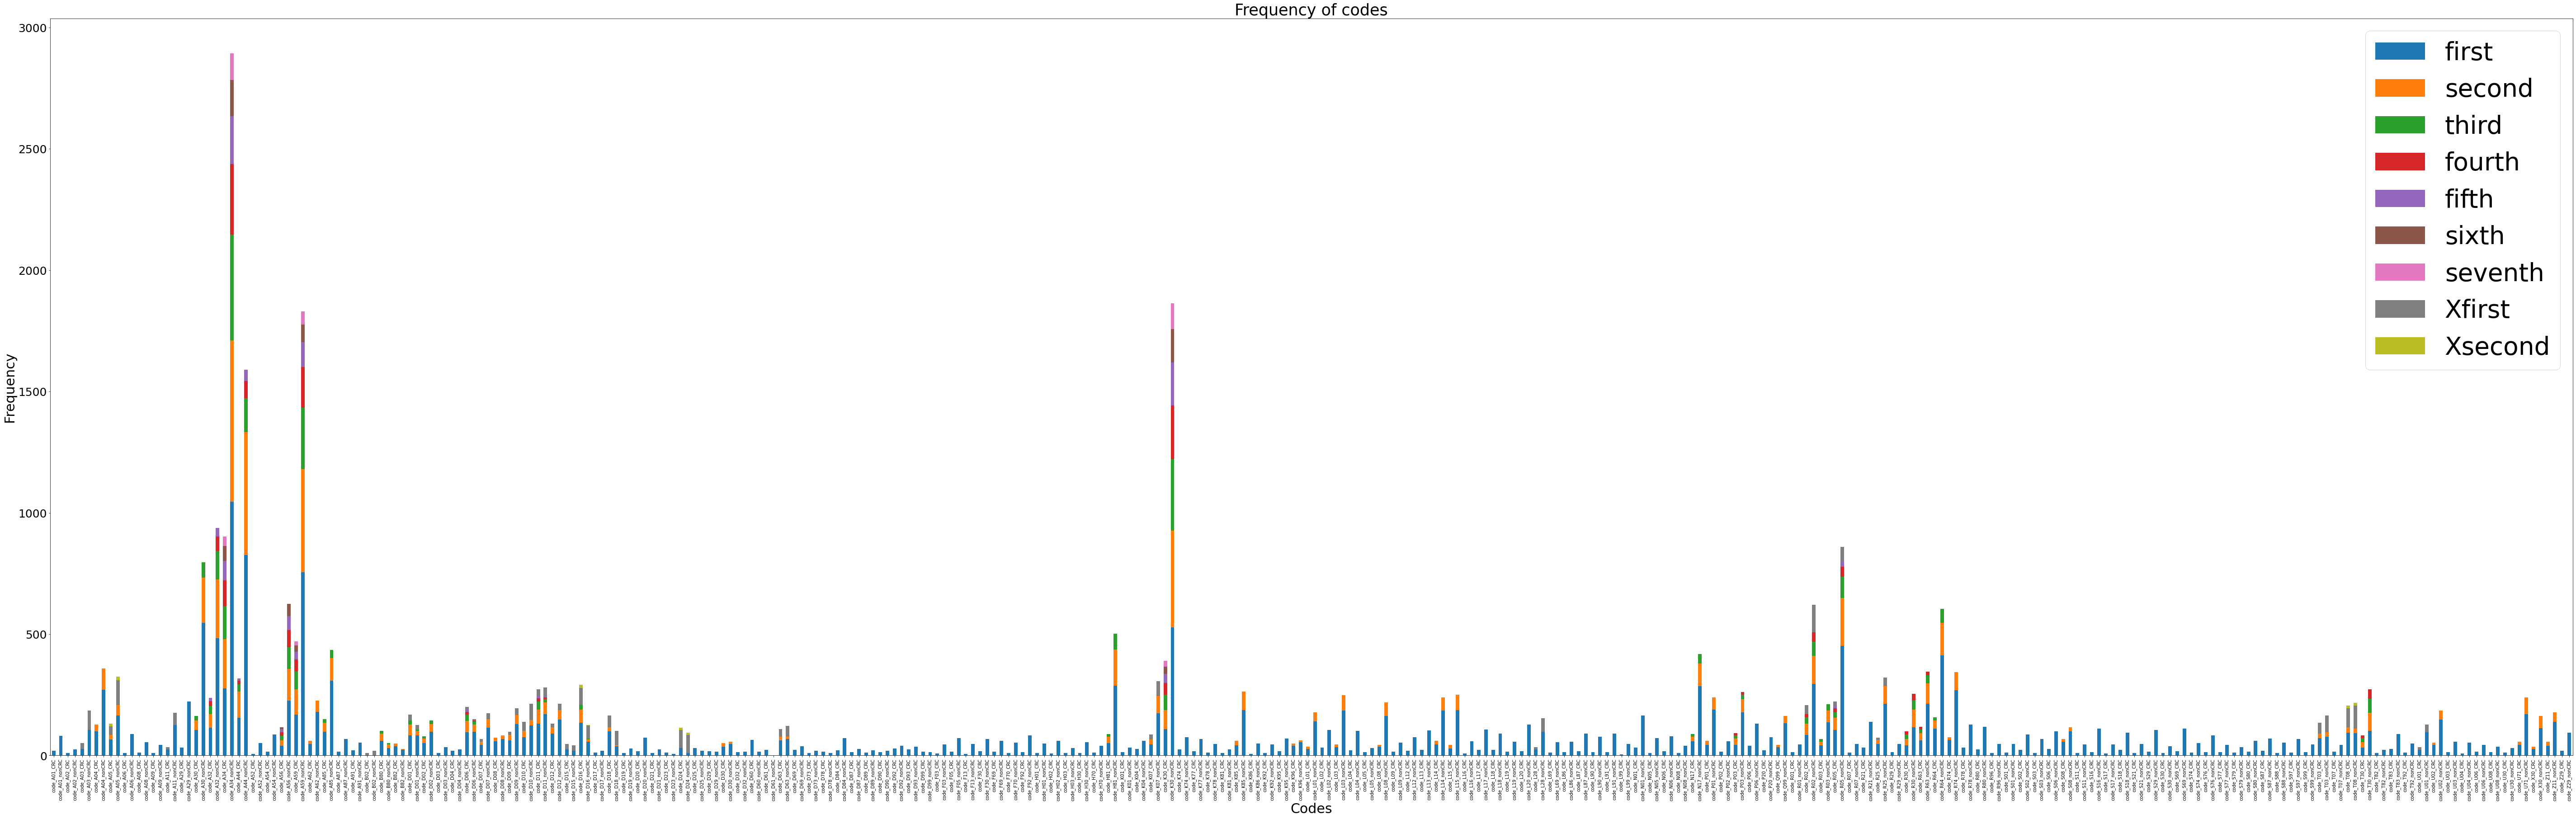

In [28]:
plot_function_2(df5)